
0: 384x640 3 cans, 2 cups, 2 balls, 2.0ms
Speed: 1.0ms preprocess, 2.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


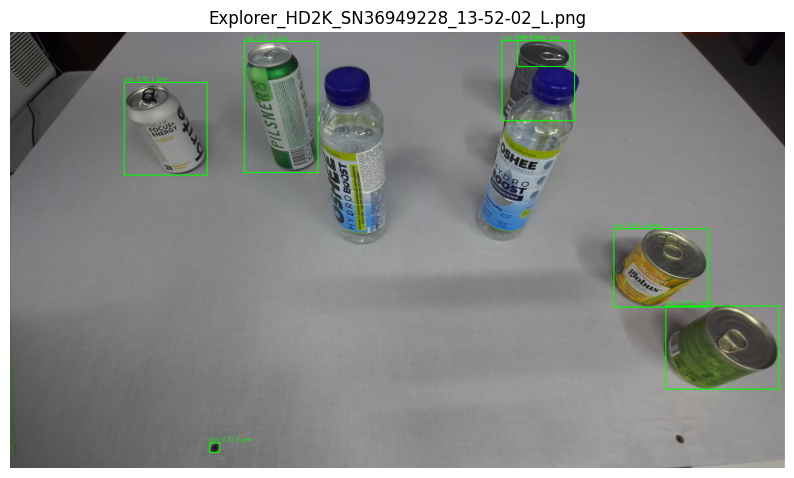


0: 384x640 1 can, 3 sponges, 6 balls, 1.8ms
Speed: 0.9ms preprocess, 1.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


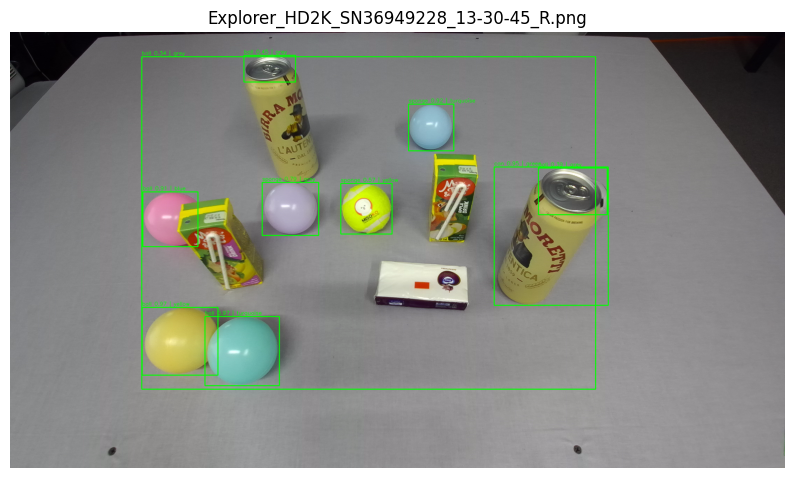


0: 384x640 3 cans, 5 cups, 1 vegetable, 1.8ms
Speed: 0.8ms preprocess, 1.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


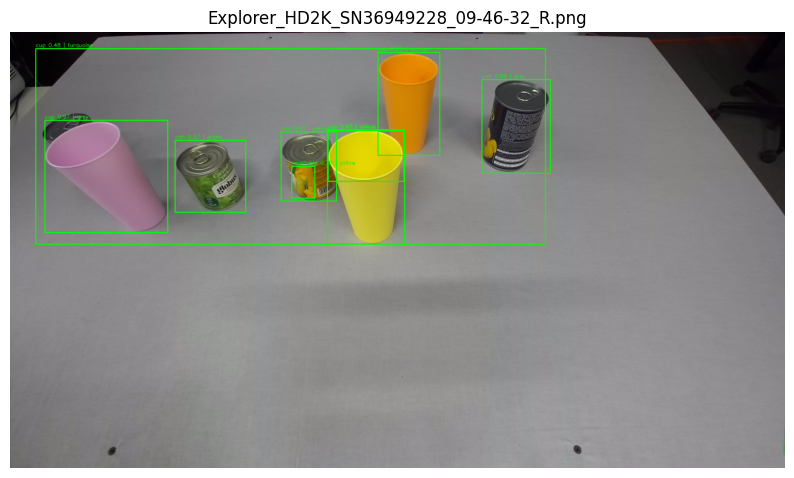


0: 384x640 4 cans, 3 cups, 4 balls, 1.8ms
Speed: 0.9ms preprocess, 1.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


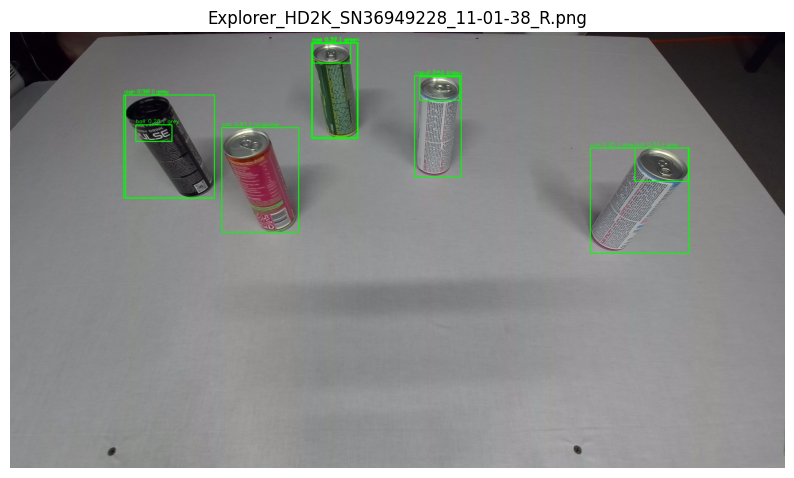


0: 384x640 3 cans, 6 cups, 1 ball, 1.8ms
Speed: 0.9ms preprocess, 1.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


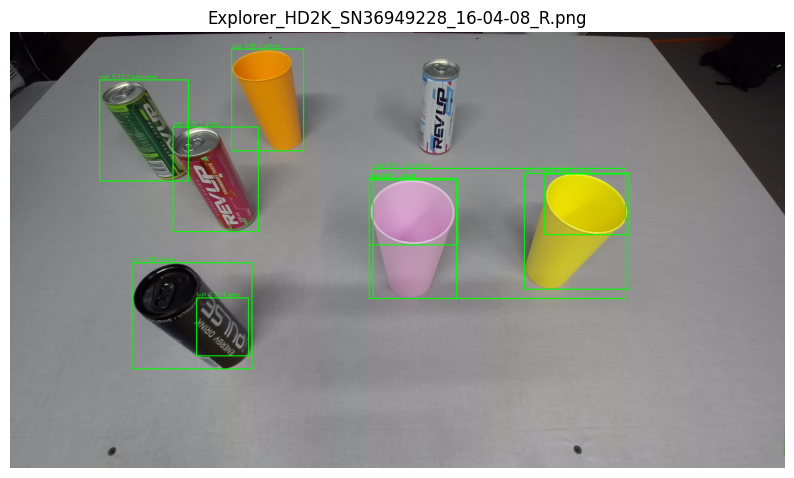


0: 384x640 3 cans, 5 cups, 1 ball, 1.8ms
Speed: 0.9ms preprocess, 1.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


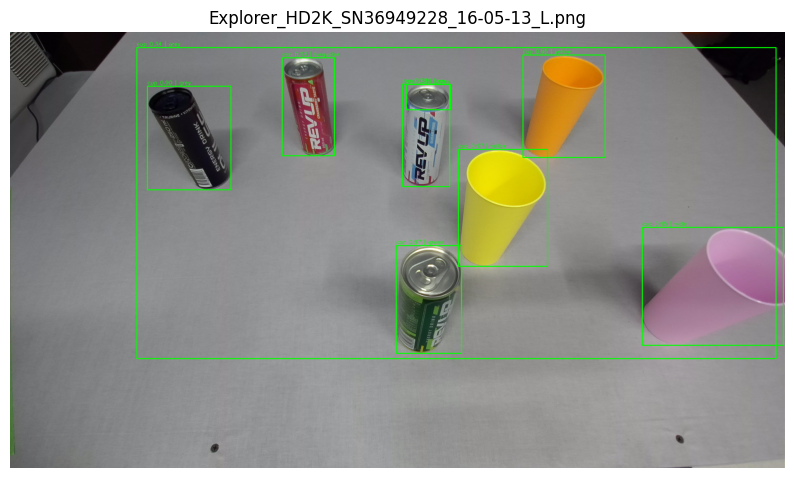


0: 384x640 2 cans, 3 cups, 3 balls, 2.0ms
Speed: 1.0ms preprocess, 2.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


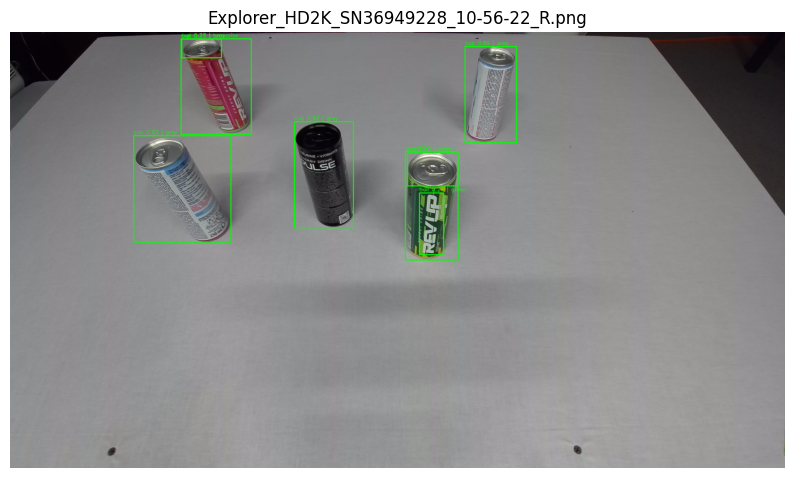


0: 384x640 3 cans, 2 cups, 3 balls, 1.8ms
Speed: 2.5ms preprocess, 1.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


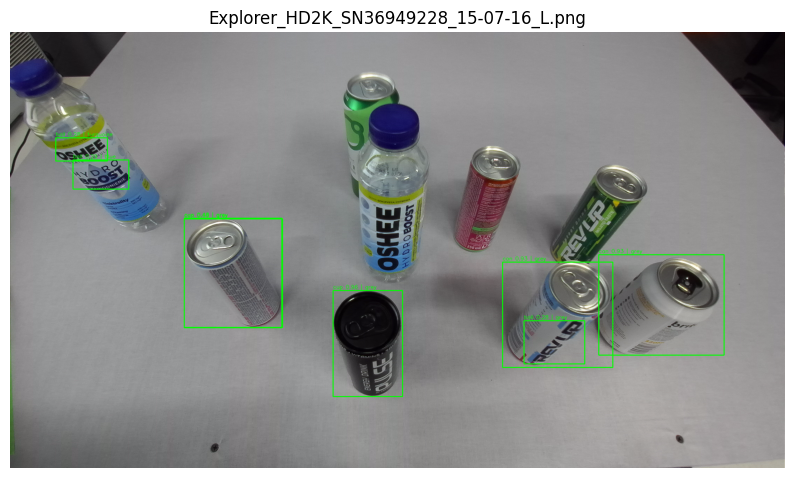


0: 384x640 2 cans, 6 ducks, 1 cup, 3 balls, 2 vegetables, 1.9ms
Speed: 1.0ms preprocess, 1.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


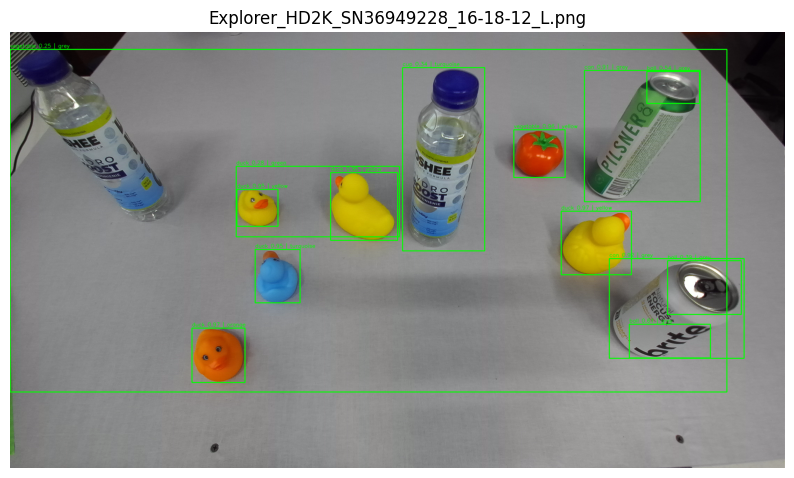


0: 384x640 2 cans, 8 ducks, 3 cups, 14 balls, 1 vegetable, 1.8ms
Speed: 0.9ms preprocess, 1.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


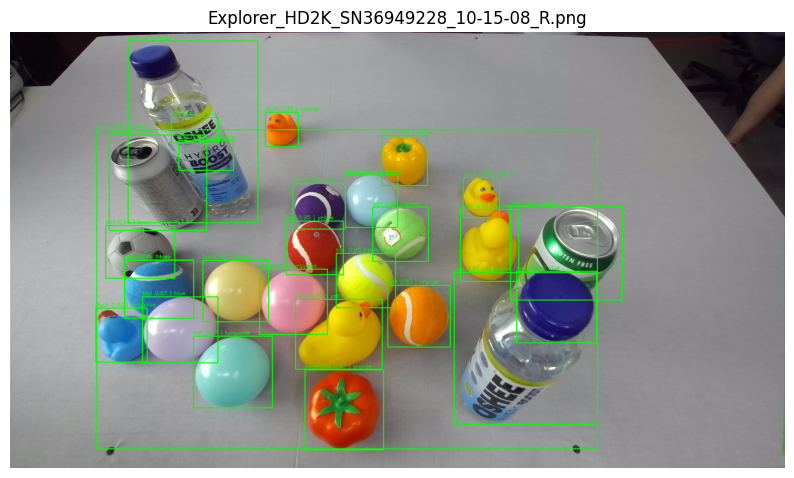

In [2]:
# Evaluation demo for YOLO detections and color
# This notebook loads the trained YOLO model, runs inference on sample images, and shows predicted classes, boxes, and the dominant color per box.

import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from color_utils import compute_dominant_color_id, COLOR_ID_TO_NAME

DATASET_DIR = '/home/ut-ai/ai-works/adaptibot/yolo_detect/dataset'
IMAGES_DIR = os.path.join(DATASET_DIR, 'images', 'val')
WEIGHTS = '/home/ut-ai/ai-works/adaptibot/yolo_detect/runs/stereo_objects5/weights/best.pt'

model = YOLO(WEIGHTS)
# Use class names from the trained model to avoid mismatches
names_map = model.names
if isinstance(names_map, dict):
	CLASS_NAMES = [names_map[i] for i in range(len(names_map))]
else:
	CLASS_NAMES = list(names_map)

def show_image_with_preds(img_path):
	img = cv2.imread(img_path, cv2.IMREAD_COLOR)
	if img is None:
		print('Failed to read', img_path)
		return
	res = model.predict(img, imgsz=640, conf=0.25)[0]
	img_show = img.copy()

	for b in res.boxes:
		cls_id = int(b.cls.item())
		conf = float(b.conf.item())
		x1, y1, x2, y2 = map(int, b.xyxy[0].tolist())
		color_id = compute_dominant_color_id(img, (x1,y1,x2,y2))
		name = CLASS_NAMES[cls_id] if cls_id < len(CLASS_NAMES) else str(cls_id)
		label = f"{name} {conf:.2f} | {COLOR_ID_TO_NAME.get(color_id, 'any/unknown')}"
		cv2.rectangle(img_show, (x1,y1), (x2,y2), (0,255,0), 2)
		cv2.putText(img_show, label, (x1, max(0,y1-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

	img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10,6))
	plt.imshow(img_show_rgb)
	plt.axis('off')
	plt.title(os.path.basename(img_path))
	plt.show()

# Demo: show a few images
val_images = [os.path.join(IMAGES_DIR, f) for f in os.listdir(IMAGES_DIR) if f.lower().endswith('.png')]
for p in val_images[:10]:
	show_image_with_preds(p)

